In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [301]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\clustering project\SG_2006.xlsx")

In [302]:
data.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,19906,2006,3169,Adrian Griffin,NaN,SG,31,7,NBA,DAL,52,45,1245,98,204,0.480,0,2,0.000,98,202,0.485,0.480,41,53,0.774,75,152,227,89,51,9,39,113,237
1,19911,2006,3568,Alex Acker,NaN,SG,23,1,NBA,DET,5,0,35,4,16,0.250,1,5,0.200,3,11,0.273,0.281,0,0,NaN,1,4,5,4,1,0,4,4,9
2,19912,2006,3569,Alex Scales,NaN,SG,27,1,NBA,SAS,1,0,0,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0
3,19935,2006,3575,Anthony Grundy,NaN,SG,26,1,NBA,ATL,12,0,108,19,38,0.500,5,15,0.333,14,23,0.609,0.566,9,14,0.643,1,16,17,9,7,0,9,14,52
4,19939,2006,3577,Antoine Wright,NaN,SG,21,1,NBA,NJN,39,0,370,29,81,0.358,1,15,0.067,28,66,0.424,0.364,11,22,0.500,8,22,30,12,4,3,21,42,70


In [303]:
pd.set_option('display.max_columns', None)

In [304]:
print(data)

     seas_id  season  player_id          player  birth_year pos  age  \
0      19906    2006       3169  Adrian Griffin         NaN  SG   31   
1      19911    2006       3568      Alex Acker         NaN  SG   23   
2      19912    2006       3569     Alex Scales         NaN  SG   27   
3      19935    2006       3575  Anthony Grundy         NaN  SG   26   
4      19939    2006       3577  Antoine Wright         NaN  SG   21   
..       ...     ...        ...             ...         ...  ..  ...   
100    20441    2006       3647       Von Wafer         NaN  SG   20   
101    20442    2006       2965   Voshon Lenard         NaN  SG   32   
102    20443    2006       2965   Voshon Lenard         NaN  SG   32   
103    20444    2006       2965   Voshon Lenard         NaN  SG   32   
104    20451    2006       3492    Willie Green         NaN  SG   24   

     experience   lg   tm   g  gs    mp  fg  fga  fg_percent  x3p  x3pa  \
0             7  NBA  DAL  52  45  1245  98  204       0.480

In [305]:
pg_columns_to_keep =  ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']


# Keep only the specified columns for a point guard
filtered_df_pg = data[pg_columns_to_keep]

# Display the resulting DataFrame
print(filtered_df_pg)

     pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0    237    0   51   75   89  227    9  45         0.480       0.480   
1      9    1    1    1    4    5    0   0         0.281       0.250   
2      0    0    0    0    0    0    0   0           NaN         NaN   
3     52    5    7    1    9   17    0   0         0.566       0.500   
4     70    1    4    8   12   30    3   0         0.364       0.358   
..   ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
100   20    2    3    5    4    8    0   0         0.184       0.158   
101  191   25   21    5   41   47    4   6         0.458       0.393   
102   99   10    8    2   18   28    2   6         0.456       0.408   
103   92   15   13    3   23   19    2   0         0.460       0.375   
104   70   10    2    1    5   15    0   2         0.500       0.424   

     x3p_percent  
0          0.000  
1          0.200  
2            NaN  
3          0.333  
4          0.067  
..           ...  
10

In [306]:

filtered_df_pg_placeholder = filtered_df_pg.fillna(-1)


C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

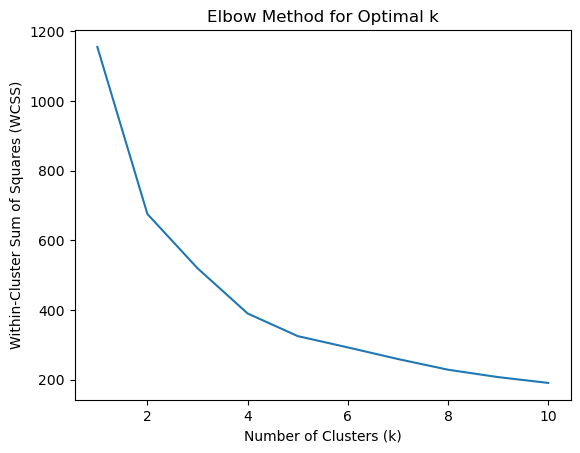

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'filtered_df_pg_placeholder' is your preprocessed DataFrame

# Impute any remaining missing values (if any)
imputer = SimpleImputer(strategy='mean')
filtered_df_pg_imputed = pd.DataFrame(imputer.fit_transform(filtered_df_pg_placeholder), columns=filtered_df_pg_placeholder.columns)

# Standardize the data
scaler = StandardScaler()
filtered_df_pg_standardized = scaler.fit_transform(filtered_df_pg_imputed)

# Use the Elbow Method to determine the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(filtered_df_pg_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [308]:
optimal_k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(filtered_df_pg_standardized)

# Add the cluster labels to your DataFrame
filtered_df_pg_placeholder['Cluster'] = cluster_labels

# Display the resulting DataFrame with cluster labels
print(filtered_df_pg_placeholder)

     pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0    237    0   51   75   89  227    9  45         0.480       0.480   
1      9    1    1    1    4    5    0   0         0.281       0.250   
2      0    0    0    0    0    0    0   0        -1.000      -1.000   
3     52    5    7    1    9   17    0   0         0.566       0.500   
4     70    1    4    8   12   30    3   0         0.364       0.358   
..   ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
100   20    2    3    5    4    8    0   0         0.184       0.158   
101  191   25   21    5   41   47    4   6         0.458       0.393   
102   99   10    8    2   18   28    2   6         0.456       0.408   
103   92   15   13    3   23   19    2   0         0.460       0.375   
104   70   10    2    1    5   15    0   2         0.500       0.424   

     x3p_percent  Cluster  
0          0.000        1  
1          0.200        3  
2         -1.000        0  
3          0.333       

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


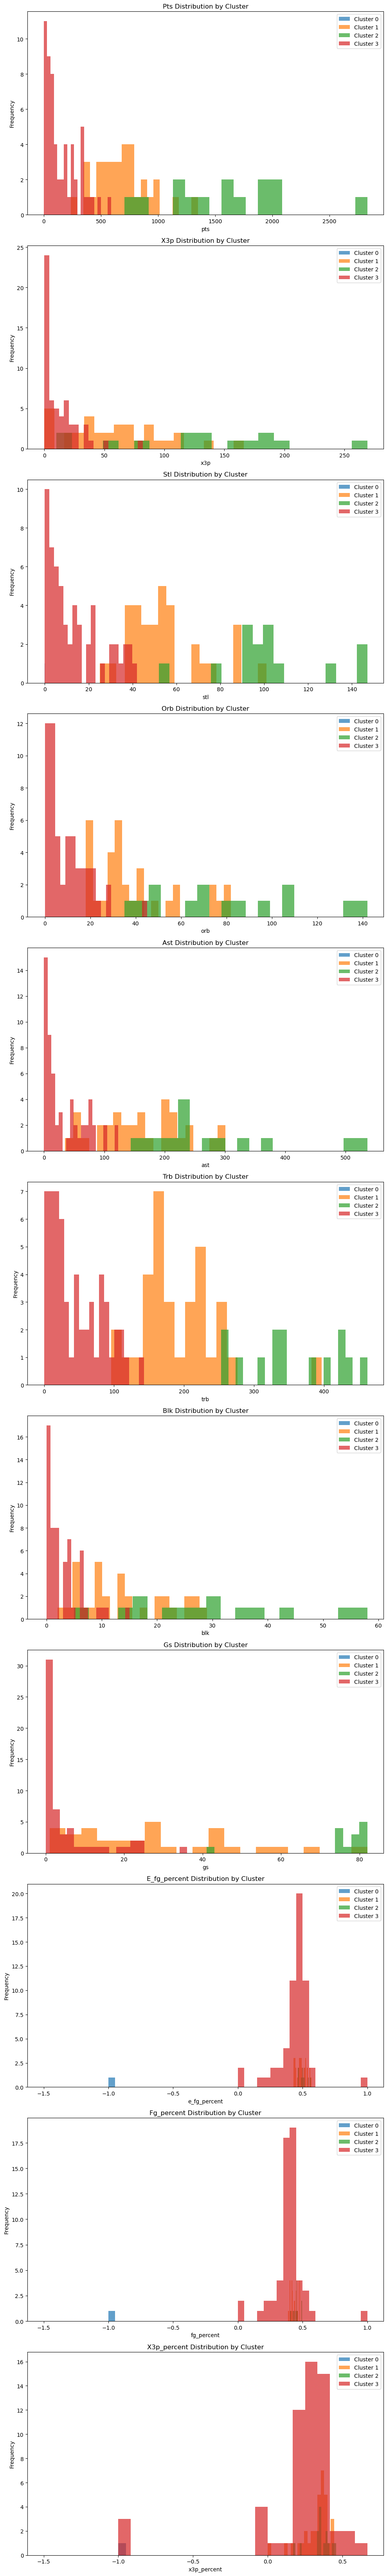

In [309]:
import matplotlib.pyplot as plt

# Features to plot
features_to_plot = ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 6 * len(features_to_plot)))

# Plot each feature for each cluster
for i, feature in enumerate(features_to_plot):
    for cluster in range(optimal_k):
        # Select data for the current cluster
        cluster_data = filtered_df_pg_placeholder[filtered_df_pg_placeholder['Cluster'] == cluster]
        
        # Plot the feature for the current cluster
        axes[i].hist(cluster_data[feature], bins=20, alpha=0.7, label=f'Cluster {cluster}')

    # Set labels and title for each subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_title(f'{feature.capitalize()} Distribution by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()
